# COM-480 Milestone 1
## Exploratory Data Analysis

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
!pip install -q xlrd
!git clone https://github.com/automoto/big-five-data.git

fatal: destination path 'big-five-data' already exists and is not an empty directory.


In [43]:
data = pd.read_csv("/content/big-five-data/big_five_scores.csv")

data["sex"]=data["sex"].map({1:"Male",2:"Female"})
data.rename({'agreeable_score': 'agreeableness', 
             'extraversion_score': 'extraversion',
             'openness_score': 'openness',
             'conscientiousness_score': 'conscientiousness',
             'neuroticiscm_score': 'neuroticism'},
            axis = 'columns', inplace = True)
traits = data.columns[4:]
data.head()

,case_id,country,age,sex,agreeableness,extraversion,openness,conscientiousness,neuroticism_score
0,1,South Afri,24,Male,0.753333,0.496667,0.803333,0.886667,0.426667
1,3,UK,24,Female,0.733333,0.680000,0.786667,0.746667,0.590000
2,4,USA,36,Female,0.880000,0.770000,0.860000,0.896667,0.296667
3,5,UK,19,Male,0.690000,0.616667,0.716667,0.636667,0.563333
4,6,UK,17,Male,0.600000,0.713333,0.646667,0.633333,0.513333


In [44]:
data.loc[data.isna().any(axis=1)]

,case_id,country,age,sex,agreeableness,extraversion,openness,conscientiousness,neuroticism_score
4278,4629,NaN,14,Male,0.603333,0.656667,0.630000,0.630000,0.766667
5142,5576,NaN,16,Female,0.606667,0.776667,0.660000,0.710000,0.533333
5561,6032,NaN,13,Female,0.723333,0.706667,0.680000,0.706667,0.426667
8602,9359,NaN,29,Female,0.593333,0.506667,0.703333,0.663333,0.606667
9062,9852,NaN,45,Female,0.750000,0.766667,0.763333,0.796667,0.403333
...,...,...,...,...,...,...,...,...,...
305059,331630,NaN,18,Female,0.740000,0.606667,0.750000,0.686667,0.650000
305283,331881,NaN,18,Male,0.840000,0.650000,0.743333,0.610000,0.460000
305286,331884,NaN,18,Male,0.583333,0.436667,0.630000,0.970000,0.260000
305921,332565,NaN,42,Female,0.850000,0.700000,0.670000,0.916667,0.550000


In [45]:
data=data.dropna(axis=0)

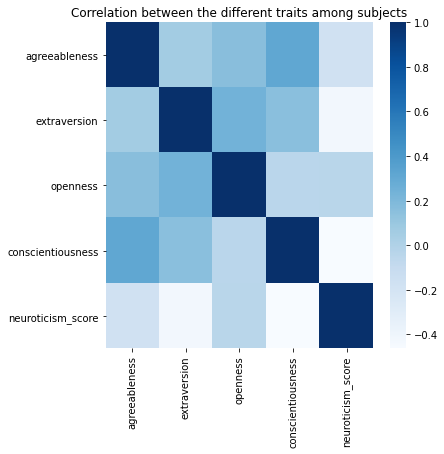

In [46]:
#@title
plt.figure(figsize=(6,6))
plt.title("Correlation between the different traits among subjects")
sns.heatmap(data[traits].corr(), cmap = 'Blues')

### Converting country names to ISO 3166-1 alpha-2 code
Most were converted using [pycountry-convert](https://pypi.org/project/pycountry-convert/). Truncated names were mapped manually. Some ambiguities could not be resolved (e.g. "Republic o"). We discarded these, but they only represent around 250 entries. 

In [47]:
import json 

!git clone https://github.com/com-480-data-visualization/data-visualization-project-2021-slackers.git



Cloning into 'data-visualization-project-2021-slackers'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 29 (delta 8), reused 18 (delta 3), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [48]:
country_map = json.load(open( "data-visualization-project-2021-slackers/codes_dict.json", 'r' ))
data.country = data.country.map(country_map)
print('{:d} entries could not be mapped to a alpha 2 code'.format(len(data[data.country == '?'])))
data = data[data.country != '?']
data=data.dropna(axis=0)

245 entries could not be mapped to a alpha 2 code


In [49]:
data["country"].nunique()

223

In [50]:
sorted(data["country"].unique())

['AD',
 'AE',
 'AF',
 'AG',
 'AI',
 'AL',
 'AM',
 'AO',
 'AQ',
 'AR',
 'AT',
 'AU',
 'AW',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BI',
 'BJ',
 'BM',
 'BN',
 'BO',
 'BR',
 'BS',
 'BT',
 'BV',
 'BW',
 'BY',
 'BZ',
 'CA',
 'CC',
 'CF',
 'CG',
 'CH',
 'CI',
 'CK',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CU',
 'CV',
 'CX',
 'CY',
 'CZ',
 'DE',
 'DJ',
 'DK',
 'DM',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'ER',
 'ES',
 'ET',
 'FI',
 'FJ',
 'FK',
 'FM',
 'FO',
 'FR',
 'GA',
 'GB',
 'GD',
 'GE',
 'GF',
 'GH',
 'GI',
 'GL',
 'GM',
 'GN',
 'GP',
 'GQ',
 'GR',
 'GT',
 'GU',
 'GW',
 'GY',
 'HK',
 'HN',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IO',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JM',
 'JO',
 'JP',
 'KE',
 'KG',
 'KH',
 'KM',
 'KN',
 'KP',
 'KR',
 'KW',
 'KY',
 'KZ',
 'LA',
 'LB',
 'LC',
 'LI',
 'LK',
 'LR',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'MD',
 'MG',
 'MH',
 'MK',
 'ML',
 'MM',
 'MN',
 'MO',
 'MQ',
 'MR',
 'MS',
 'MT',
 'MU',
 'MV',
 'MW',
 'MX',
 'MY',
 'MZ',

In [51]:
data["country"].value_counts().sort_values(ascending=False)

US    212625
CA     21798
GB     16489
AU     10400
NL      3469
       ...  
GW         1
GQ         1
LI         1
MR         1
MS         1
Name: country, Length: 223, dtype: int64

In [52]:
!pip install pycountry-convert

     |████████████████████████████████| 10.1MB 5.5MB/s 
     |████████████████████████████████| 245kB 41.2MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=716720011bc8fd6840b1e52e0c15c7d45a7ca989cc3668e60fc9d424bc86a606
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-cov 2.11.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-mock 3.5.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1

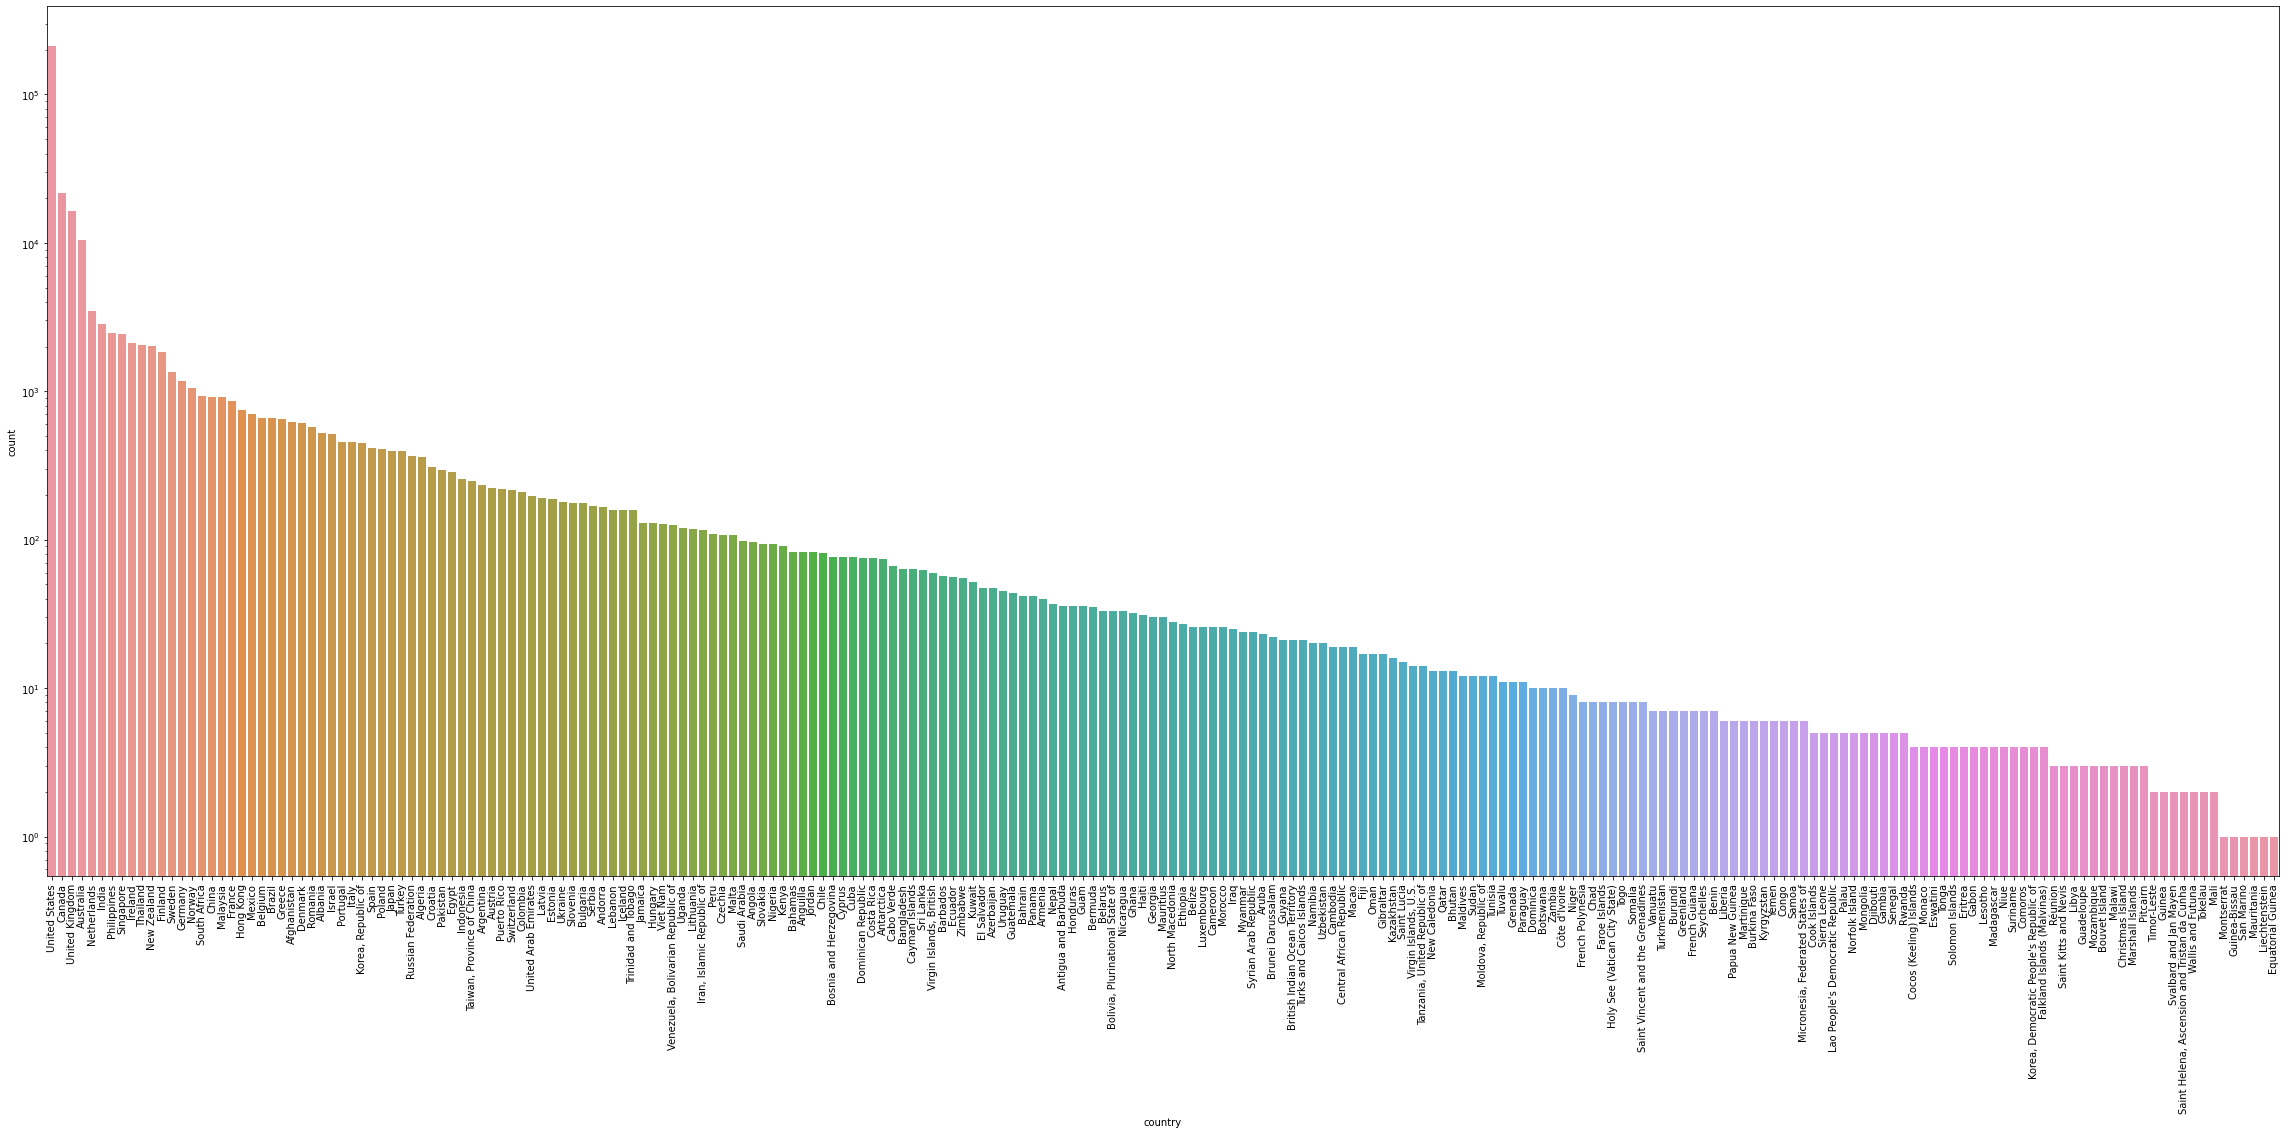

In [53]:
from pycountry_convert import country_alpha2_to_country_name
data.country = data.country.map(lambda x: country_alpha2_to_country_name(x))

plt.figure(figsize=(40,16))
chart=sns.countplot(data=data,x="country",order=data["country"].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.yscale("log")

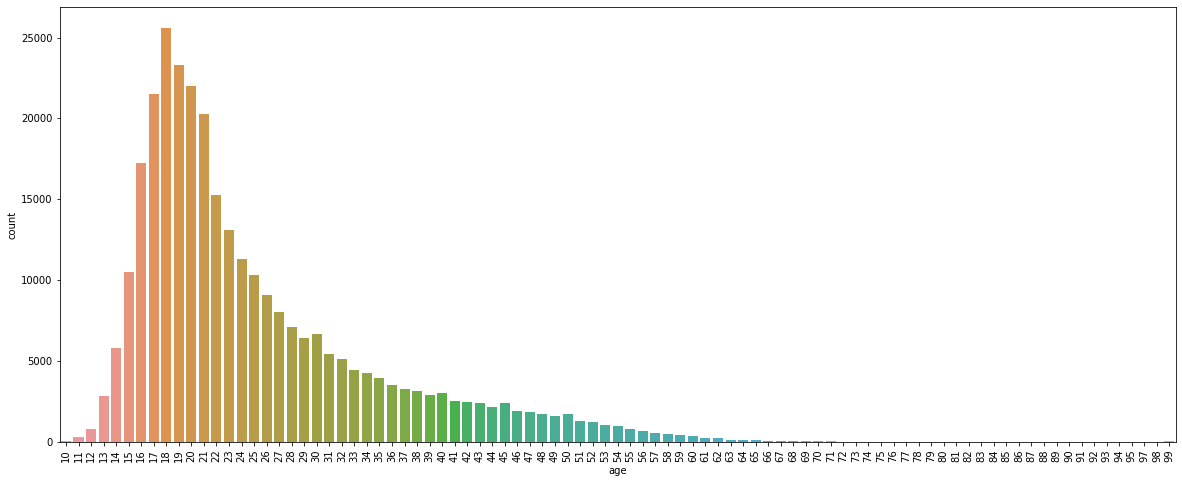

In [54]:
plt.figure(figsize=(20,8));
chart=sns.countplot(data=data,x="age");
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

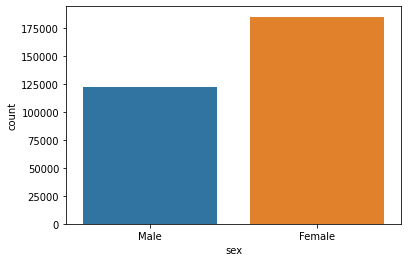

In [55]:
sns.countplot(data=data,x="sex");

In [56]:
sex_data = data.groupby(["sex"])
age_data = data.groupby(["age"])
country_data = data.groupby(["country"])
sex_age_data = data.groupby(["sex","age"])
age_country_data = data.groupby(["age","country"])
sex_country_data = data.groupby(["sex","country"])

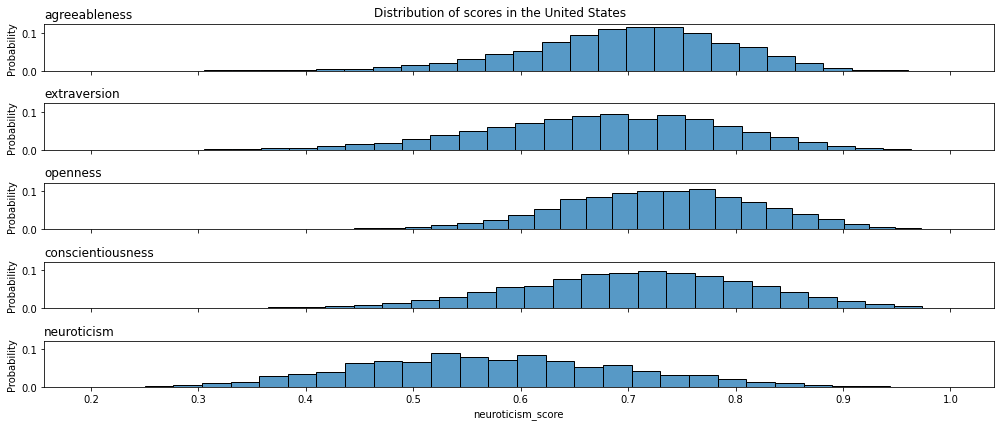

In [57]:
f, ax = plt.subplots(5, 1, figsize = (14, 6), sharey = True, sharex = True)
plt.suptitle('Distribution of scores in the United States')
US = data[data.country == 'United States']
for i, trait in enumerate(traits):
    sns.histplot(US[trait], ax = ax[i], bins = 30, stat = 'probability')
    ax[i].set_title(trait.split('_')[0], loc = 'left')
    
plt.tight_layout()